In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation

In [3]:
df=pd.read_csv('myInput/reduced_phases.csv')
df.drop(columns=['0'],axis=1,inplace=True)
df=df.dropna()
df=df.drop_duplicates()
df

,alloy_name,phases,YS_MPa,R_delta,S_config,VEC,R_cov_delta,density_avg,Tm_avg,E_avg,...,Compress_avg,Compress_delta,EN_Allen_avg,H_avg,Vm_delta,E_coh_avg,E_coh_delta,Senkov_param,H_ch_M_L_R,H_el_M_S_R
0,AlCoCrFeMo0.5Ni,BCC+Im,2757,0.056584,0.014697,7.090909,0.064873,7.378182,1794.149091,184.581818,...,0.681455,0.493707,1.730000,665.090909,0.171144,4.365455,0.196517,2.277108,-11.58,5.43
1,AlCoCrFeMo0.4Ni,BCC+Im,2670,0.056687,0.014585,7.111111,0.061331,7.325926,1773.762963,181.888889,...,0.687296,0.489985,1.734815,672.222222,0.170718,4.320000,0.184600,2.201734,-11.75,5.17
2,AlCoCrFeMo0.3Ni,BCC+Im,2649,0.056775,0.014432,7.132075,0.057185,7.271698,1752.607547,179.094340,...,0.693358,0.486033,1.739811,679.622641,0.170159,4.272830,0.170030,2.120157,-11.93,4.88
3,AlCoCrFeNb0.5Ni,BCC+Laves,2473,0.062718,0.014697,7.000000,0.084390,7.230000,1780.967273,164.036364,...,0.701545,0.460904,1.724545,654.181818,0.195161,4.433636,0.238396,1.592164,-16.44,6.30
4,AlCoCrFeMo0.2Ni,BCC+Im,2456,0.056847,0.014222,7.153846,0.052247,7.215385,1730.638462,176.192308,...,0.699654,0.481837,1.745000,687.307692,0.169446,4.223846,0.151741,2.032406,-12.11,4.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,CuMnNiZn,FCC,215,0.044498,0.011526,10.000000,0.036196,8.072500,1324.287500,159.175000,...,1.154500,0.454673,1.767500,338.952500,0.128099,3.050000,0.367762,3.010508,-5.07,2.87
129,CoFeNi,FCC,209,0.003781,0.009134,9.000000,0.025832,8.543333,1769.000000,211.666667,...,0.551333,0.055990,1.840000,763.666667,0.031103,4.370000,0.015294,15.536349,-1.04,0.23
130,CoFeNiSi0.25,FCC,196,0.021105,0.010686,8.615385,0.027944,8.065385,1762.692308,204.000000,...,0.586769,0.215222,1.846154,885.692308,0.075222,4.390000,0.021518,2.802976,-6.72,1.19
131,Al0.25CoFeNi,FCC,158,0.038915,0.010686,8.538462,0.026554,8.093846,1704.716923,200.784615,...,0.615462,0.364146,1.822308,717.769231,0.124579,4.294615,0.062618,3.082315,-5.91,1.98


Text(198.56944444444443, 0.5, 'YS_MPa')

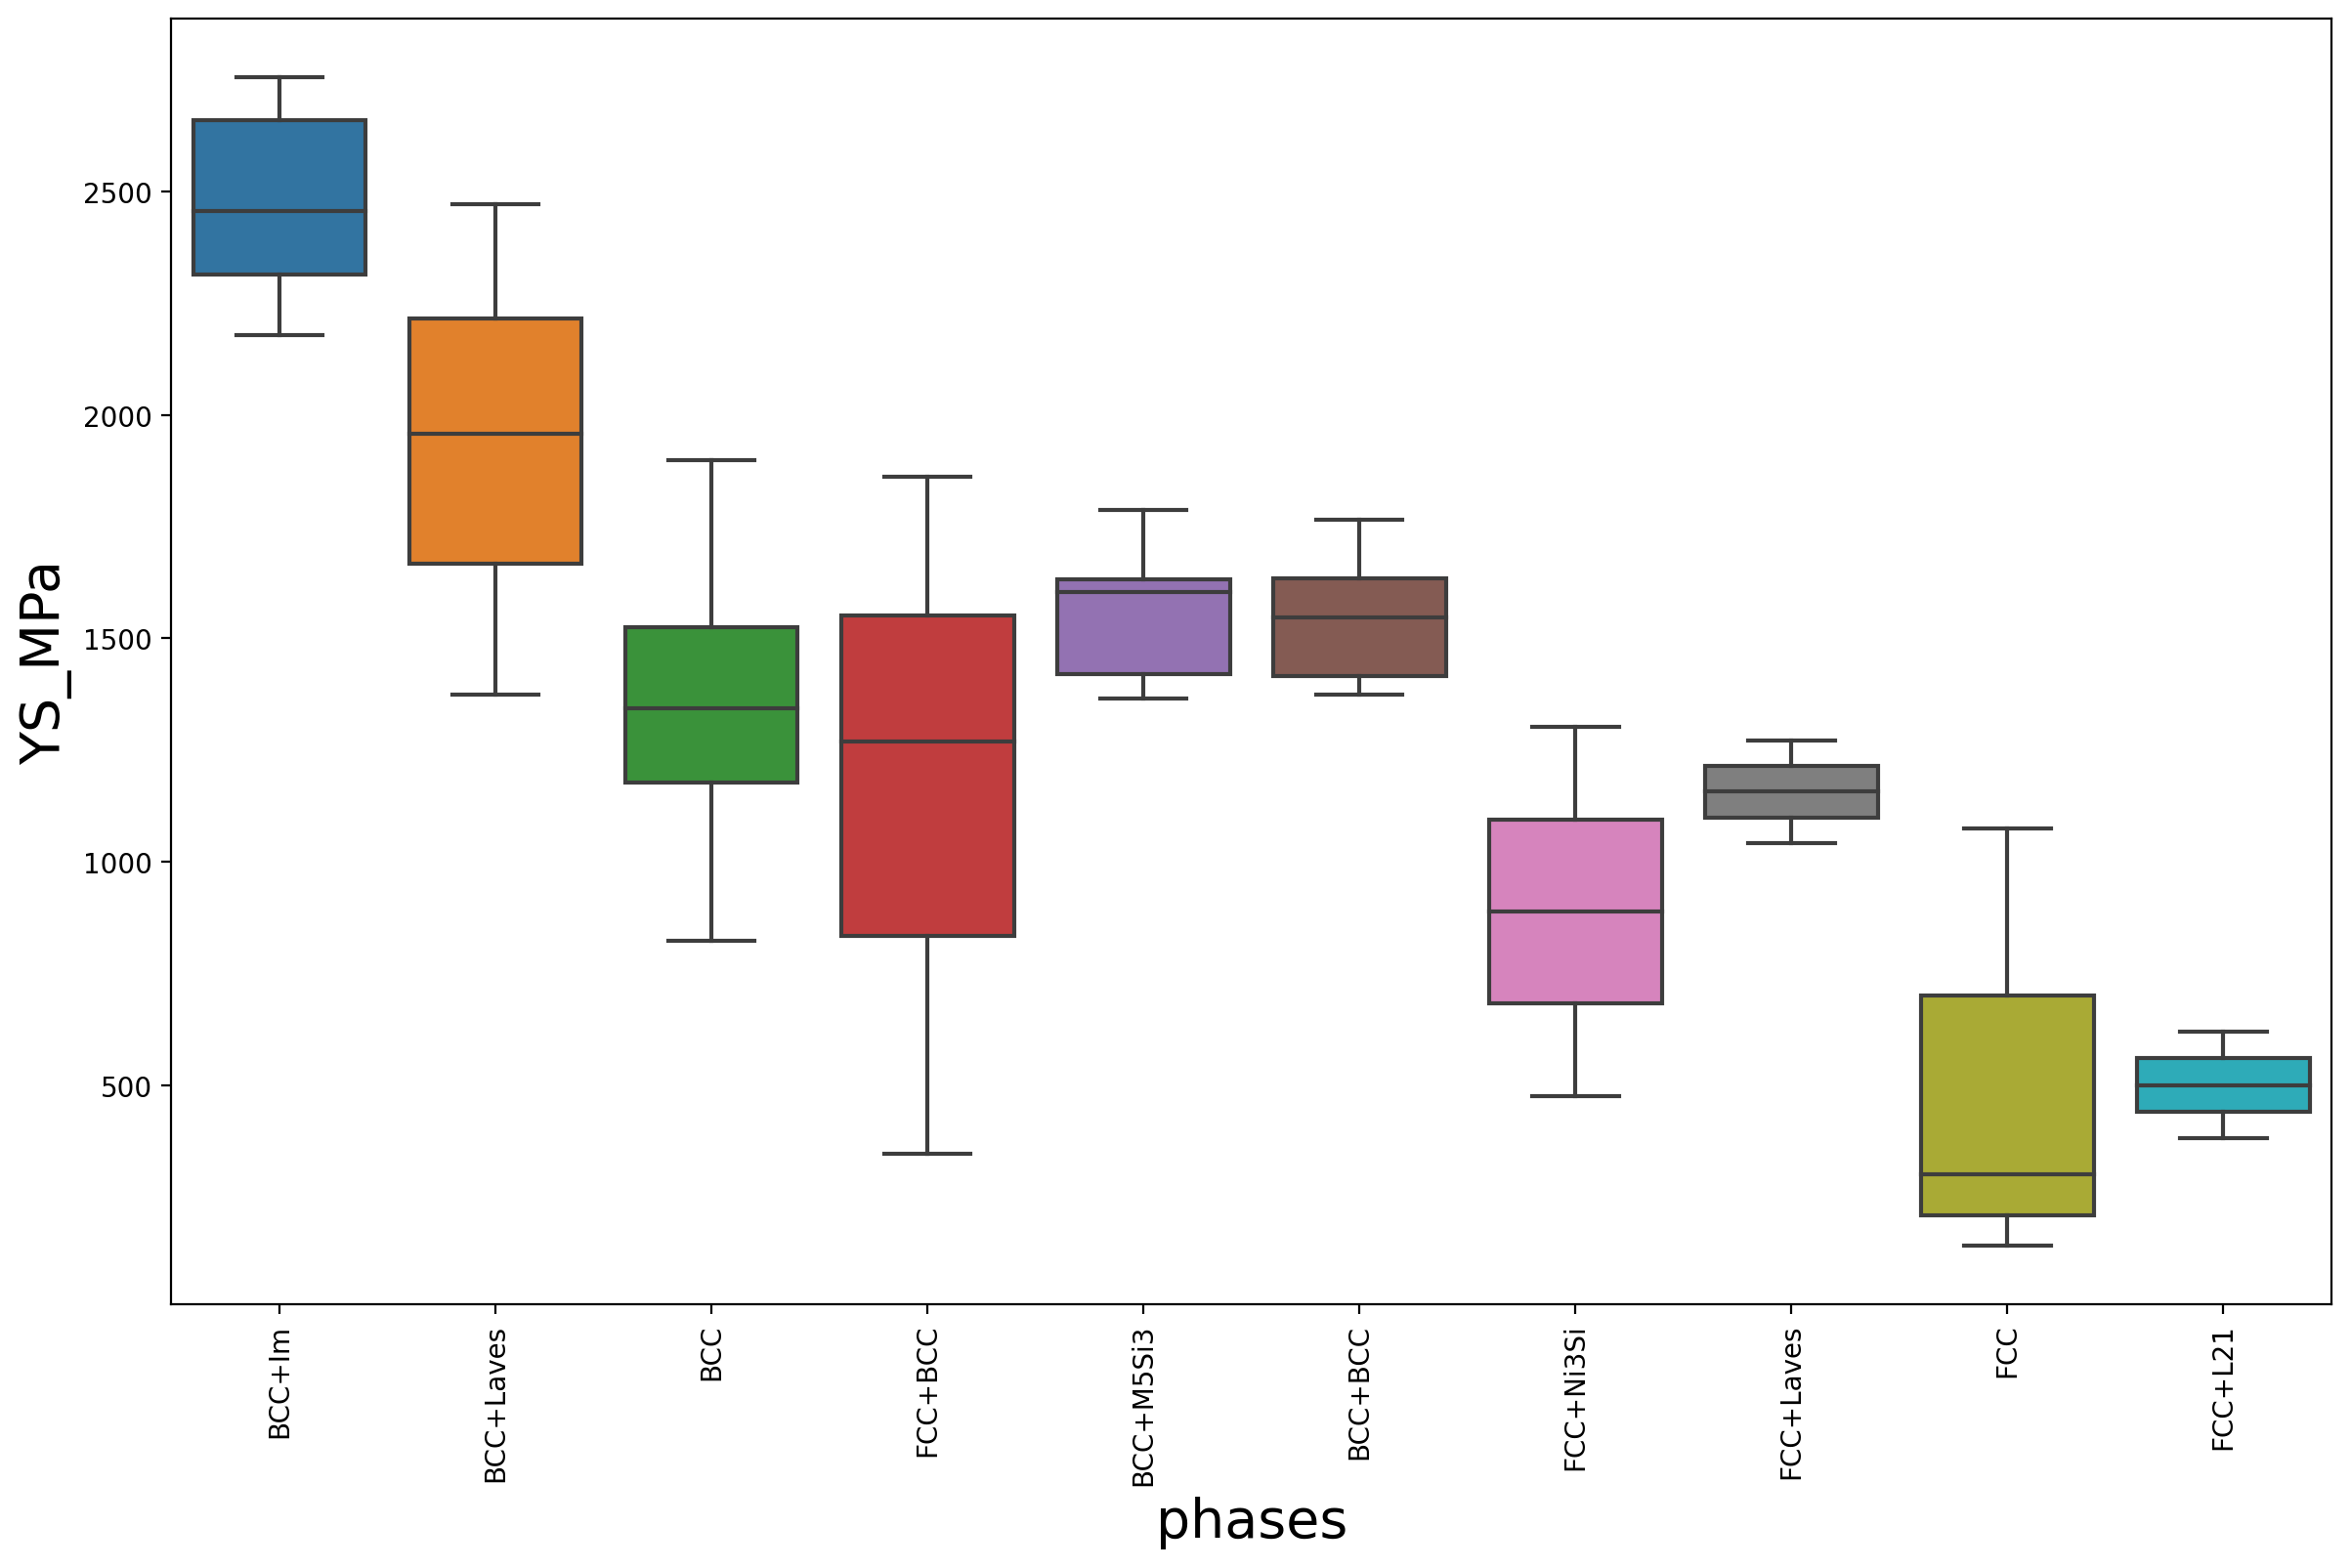

In [5]:
plt.figure(figsize=(12,8),dpi=200)
# sns.scatterplot(x=df['R_delta'],y=df['YS_MPa'],style=df['phases'],hue=df['phases'],size=df['phases'],palette='Set2')

plt.xticks(rotation=90)
sns.boxplot(x=df['phases'],y=df['YS_MPa'])
plt.tight_layout()
plt.xlabel('phases',size=20)
plt.ylabel('YS_MPa',size=20)
#plt.savefig("output.png")


In [66]:
# plt.figure(figsize=(15,10))
# sns_correlation_plot=sns.heatmap(corr_matrix)
# fig=sns_correlation_plot.get_figure()
#sns.clustermap(corr_matrix)xxd
#fig.savefig("sns_correlation_plot.png")

In [6]:
df.columns

Index(['alloy_name', 'phases', 'YS_MPa', 'R_delta', 'S_config', 'VEC',
       'R_cov_delta', 'density_avg', 'Tm_avg', 'E_avg', 'E_delta', 'G_avg',
       'G_delta', 'B_avg', 'B_delta', 'Compress_avg', 'Compress_delta',
       'EN_Allen_avg', 'H_avg', 'Vm_delta', 'E_coh_avg', 'E_coh_delta',
       'Senkov_param', 'H_ch_M_L_R', 'H_el_M_S_R'],
      dtype='object')

In [104]:
X=df.drop(columns=['alloy_name','phases'])
y=df['YS_MPa'].tolist()
num_feats=22
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    ind=np.argsort(cor_list)[-1::-1]
    s_f=[[feature_name[x],cor_list[x]] for x in ind]
    print(s_f)
        
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

[['YS_MPa', 1.0], ['S_config', 0.5416996647697279], ['R_delta', 0.42065545730320303], ['E_delta', 0.38981570050805286], ['G_delta', 0.3661609504654344], ['Compress_delta', 0.3446205198407001], ['H_el_M_S_R', 0.3322410928970396], ['R_cov_delta', 0.2933304418017331], ['Vm_delta', 0.28732095966021826], ['B_delta', 0.24977905244607423], ['H_avg', 0.18854474801933332], ['Tm_avg', 0.13001918207953106], ['E_coh_avg', 0.12591800383942395], ['B_avg', 0.1155741742080866], ['E_coh_delta', 0.06874778518169015], ['G_avg', 0.014105935506302843], ['E_avg', -0.060303331810983865], ['Senkov_param', -0.0757438399405375], ['Compress_avg', -0.13029126446174377], ['EN_Allen_avg', -0.1553389434206328], ['density_avg', -0.17239709217782312], ['H_ch_M_L_R', -0.3138169804678839], ['VEC', -0.32789591776829086]]
22 selected features


In [7]:
from numpy import mean
from numpy import std
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
X=df.drop(columns=['alloy_name','phases','YS_MPa'])
y=df['YS_MPa']
rfe=RFE(estimator=DecisionTreeRegressor(),n_features_to_select=10)
rfe.fit(X,y)
features,isSelected,ranking=list(),list(),list()
for i in range(len(X.columns.tolist())):
    features.append(X.columns.tolist()[i])
    isSelected.append(rfe.support_[i])
    ranking.append(rfe.ranking_[i])
    #print(f'ColumnName:{X.columns.tolist()[i]},Selected:{rfe.support_[i]},Ranking:{rfe.ranking_[i]}')
result_df=pd.DataFrame(data=[[features[i],isSelected[i],ranking[i]] for i in range(len(features))],columns=['Features','isSelected','ranking'])
result_df=result_df.sort_values(by='ranking',ascending=True)
result_df.set_index('Features')

,isSelected,ranking
Features,,
R_delta,True,1
S_config,True,1
VEC,True,1
R_cov_delta,True,1
Tm_avg,True,1
Compress_delta,True,1
E_delta,True,1
G_avg,True,1
B_delta,True,1


Name: 2, Score: -301.9394871794872
Name: 3, Score: -264.59820512820517
Name: 4, Score: -258.40999999999997
Name: 5, Score: -264.7438461538461
Name: 6, Score: -250.03512820512822
Name: 7, Score: -252.72512820512821
Name: 8, Score: -257.2130769230769
Name: 9, Score: -249.31615384615384
Name: 10, Score: -255.234358974359
Name: 11, Score: -246.18564102564105
Name: 12, Score: -260.7253846153846
Name: 13, Score: -251.83333333333331
Name: 14, Score: -244.99358974358972
Name: 15, Score: -241.4353846153846
Name: 16, Score: -265.53
Name: 17, Score: -244.0666666666667
Name: 18, Score: -251.8658974358974
Name: 19, Score: -249.62256410256407
Name: 20, Score: -258.65871794871794
Name: 21, Score: -252.51820512820512


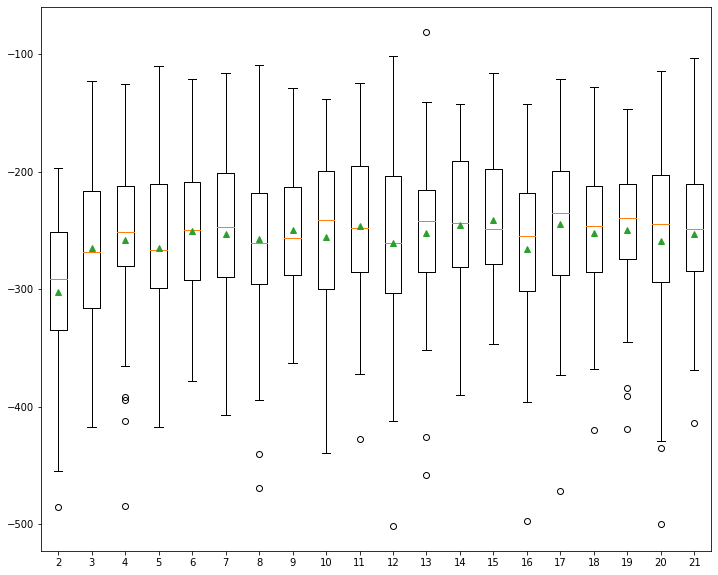

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
def get_dataset():
    return df.drop(columns=['alloy_name','phases','YS_MPa']).values,df['YS_MPa'].values

def get_models():
    models=dict()
    for i in range(2,22):
        rfe=RFE(estimator=DecisionTreeRegressor(),n_features_to_select=i)
        model=DecisionTreeRegressor()
        models[str(i)]=Pipeline(steps=[('s',rfe),('m',model)])
    return models

def evaluate_model(X,y,model):
    cv=RepeatedKFold(n_splits=10,n_repeats=5)
    score=cross_val_score(model,X,y,cv=cv,scoring='neg_mean_absolute_error',n_jobs=-1,error_score='raise')
    return score

X,y=get_dataset()
models=get_models()
results,names=list(),list()
for name,model in models.items():
    score=evaluate_model(X,y,model)
    names.append(name)
    results.append(score)
    print(f'Name: {name}, Score: {mean(score)}')

plt.figure(figsize=(12,10))
plt.boxplot(x=results,labels=names,showmeans=True)
plt.savefig("Result.png")

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=10)

# X_train.shape

# X_test.shape

# y_train.shape

# y_test.shape

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='relu'))

model.compile(optimizer='adam',loss='MSE')

model.fit(X_train,y_train,epochs=1000)

np.sqrt(20893.7188)

# loss = model.history.history['loss']

# sns.lineplot(x=range(len(loss)),y=loss)
# plt.title("Training Loss per Epoch");

# model.metrics_names

training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)
test_score

# model = Sequential()
# model.add(Dense(4,activation='softmax'))
# model.add(Dense(4,activation='softmax'))
# model.add(Dense(4,activation='softmax'))


# model.add(Dense(1))

# model.compile(optimizer='adam',loss='mse')

# model.fit(X_train,y_train,epochs=1000)

# training_score = model.evaluate(X_train,y_train,verbose=0)
# test_score = model.evaluate(X_test,y_test,verbose=0)

# training_score
# test_score

test_predictions = model.predict(X_test)
test_predictions.reshape(21)
r2_score(y_test,test_predictions)

plt.figure(figsize=(20,20))
ind=np.arange(21)
plt.plot(np.arange(21),y_test,"r+",ms=10,label="True Value")
plt.plot(np.arange(21),test_predictions,"b+",ms=10,label="Predicted Value")
plt.xlabel("Index")
plt.ylabel("YS_Mpa")
plt.legend()
alloy_names=[]
for x in y_test.values:
    alloy_names.append(str(df[df["YS_Mpa"]==x][['alloy_name']].values[0][0]))
phases=[]
for x in y_test.values:
    phases.append(str(df[df["YS_Mpa"]==x][['phases']].values[0][0]))
YS_MPa=[]
for x in y_test.values:
    YS_MPa.append(str(df[df["YS_Mpa"]==x][['YS_Mpa']].values[0][0]))
#plt.savefig("r2_score_0.5718_100l.png")
for i in range(len(ind)):
    txt="Alloy:"+str(alloy_names[i])+"\nYS_Mpa:"+str(YS_MPa[i])+"\nphases:"+str(phases[i])+"\nPredicted:"+str(test_predictions[i][0])
    plt.annotate(txt,xy=(ind[i],test_predictions[i]))
plt.savefig("r2_score_0.73512_100l_r5.png",dpi=100)

pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

sns.distplot(pred_df['Error'],bins=50)

from sklearn.metrics import mean_absolute_error,mean_squared_error

mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

test_score

test_score**0.5

y_test.values

alloy_names=[]
for x in y_test.values:
    alloy_names.append(str(df[df["YS_Mpa"]==x][['alloy_name']].values[0][0]))
    

alloy_names

[['YS_MPa', 1.0], ['R_cov_delta', 0.7765006059341575], ['H_el_M_S_R', 0.6976846396738041], ['Vm_delta', 0.680170738092305], ['R_delta', 0.6780664528682492], ['S_config', 0.6303108073192202], ['E_delta', 0.5451029214660384], ['H_avg', 0.5383147378494004], ['G_delta', 0.5161549064676525], ['E_coh_avg', 0.24900904491375545], ['Tm_avg', 0.07260665986724733], ['Compress_delta', 0.06926032631242983], ['B_delta', 0.025898605397053912], ['Compress_avg', -0.03878854672346664], ['E_coh_delta', -0.11606063631839156], ['B_avg', -0.11655904819978016], ['Senkov_param', -0.27781502970292293], ['G_avg', -0.4881643649262348], ['E_avg', -0.5153671254433023], ['H_ch_M_L_R', -0.5289443437012525], ['density_avg', -0.6462711764535042], ['EN_Allen_avg', -0.6703504047205324], ['VEC', -0.6985912654002207]]
22 selected features
Name: 2, Score: -264.49
Name: 3, Score: -274.08
Name: 4, Score: -226.26
Name: 5, Score: -236.89
Name: 6, Score: -241.11
Name: 7, Score: -258.16
Name: 8, Score: -261.09
Name: 9, Score: -2

,isSelected,ranking
Features,,
E_coh_delta,True,1
Vm_delta,True,1
VEC,True,1
Compress_delta,True,1
H_ch_M_L_R,True,1
Senkov_param,True,1
H_avg,False,2
R_cov_delta,False,3
EN_Allen_avg,False,4


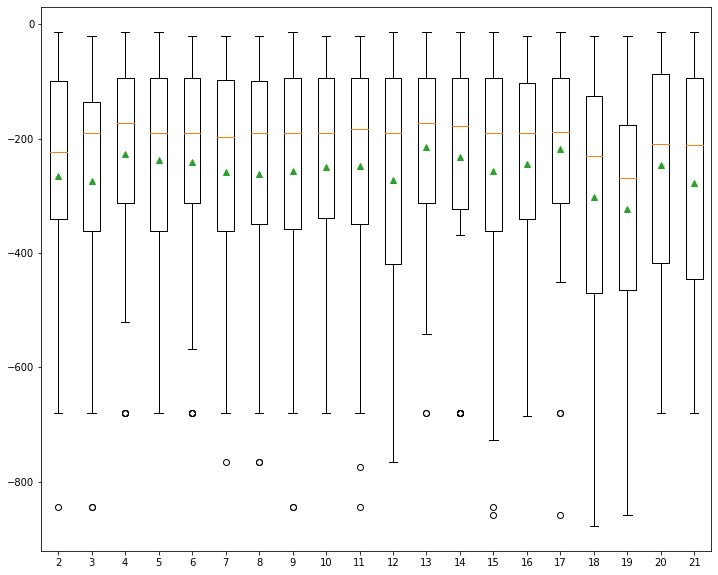

In [30]:
df=df.dropna()
df=df.drop_duplicates()
df=df[df['phases']=='FCC']

df

X=df.drop(columns=['alloy_name','phases'])
y=df['YS_MPa'].tolist()
num_feats=22
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    ind=np.argsort(cor_list)[-1::-1]
    s_f=[[feature_name[x],cor_list[x]] for x in ind]
    print(s_f)
        
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

df.corr()['YS_MPa'].sort_values(ascending=False)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
def get_dataset():
    return df.drop(columns=['alloy_name','phases','YS_MPa']).values,df['YS_MPa'].values

def get_models():
    models=dict()
    for i in range(2,22):
        rfe=RFE(estimator=DecisionTreeRegressor(),n_features_to_select=i)
        model=DecisionTreeRegressor()
        models[str(i)]=Pipeline(steps=[('s',rfe),('m',model)])
    return models

def evaluate_model(X,y,model):
    cv=RepeatedKFold(n_splits=10,n_repeats=5)
    score=cross_val_score(model,X,y,cv=cv,scoring='neg_mean_absolute_error',n_jobs=-1,error_score='raise')
    return score

X,y=get_dataset()
models=get_models()
mean_results,results,names=list(),list(),list()

for name,model in models.items():
    score=evaluate_model(X,y,model)
    names.append(name)
    results.append(score)
    print(f'Name: {name}, Score: {mean(score)}')

print(f'Name: Mean over all values: {mean(results)}')
plt.figure(figsize=(12,10))
plt.boxplot(x=results,labels=names,showmeans=True)
plt.savefig("Result_BCC.png")

from numpy import mean
from numpy import std
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
X=df.drop(columns=['alloy_name','phases','YS_MPa'])
y=df['YS_MPa']
rfe=RFE(estimator=DecisionTreeRegressor(),n_features_to_select=6)
rfe.fit(X,y)
features,isSelected,ranking=list(),list(),list()
for i in range(len(X.columns.tolist())):
    features.append(X.columns.tolist()[i])
    isSelected.append(rfe.support_[i])
    ranking.append(rfe.ranking_[i])
    #print(f'ColumnName:{X.columns.tolist()[i]},Selected:{rfe.support_[i]},Ranking:{rfe.ranking_[i]}')
result_df=pd.DataFrame(data=[[features[i],isSelected[i],ranking[i]] for i in range(len(features))],columns=['Features','isSelected','ranking'])
result_df=result_df.sort_values(by='ranking',ascending=True)
result_df.set_index('Features')

In [14]:
df

,alloy_name,phases,YS_MPa,R_delta,S_config,VEC,R_cov_delta,density_avg,Tm_avg,E_avg,...,Compress_avg,Compress_delta,EN_Allen_avg,H_avg,Vm_delta,E_coh_avg,E_coh_delta,Senkov_param,H_ch_M_L_R,H_el_M_S_R
96,AlCuFeNiTi,FCC,1074,0.070331,0.013381,7.200000,0.085098,6.588000,1554.588000,146.240000,...,0.839600,0.366395,1.704000,906.800000,0.200928,4.090000,0.137712,1.137950,-18.28,6.88
107,Al1.125CuFe0.75NiTi1.125,FCC,980,0.070275,0.013299,6.975000,0.088402,6.374750,1535.946000,139.995000,...,0.868300,0.361524,1.688750,949.325000,0.201014,4.082000,0.143278,0.984885,-20.74,7.11
117,Al0.25CoCrCu0.75FeNiTi0.5,FCC,750,0.053862,0.015547,8.000000,0.069254,7.714545,1765.462727,171.736364,...,0.645318,0.318591,1.754545,917.181818,0.163384,4.200000,0.094338,3.801666,-7.22,3.91
118,CoCrCuFeNiTi0.5,FCC,700,0.047627,0.014697,8.363636,0.069439,7.999091,1784.749091,174.363636,...,0.615545,0.210810,1.765455,926.363636,0.147143,4.204545,0.092133,7.669813,-3.42,3.18
122,Al0.5CoCrCuFeNi,FCC,388,0.041121,0.014697,8.272727,0.036593,7.834545,1692.960000,171.472727,...,0.655000,0.370447,1.786364,691.545455,0.125823,4.071818,0.096654,12.959229,-1.92,1.99
125,Al0.158CuMnNi,FCC,330,0.038881,0.010328,9.016466,0.039156,8.102153,1504.776618,175.773148,...,1.002796,0.493093,1.815826,330.967701,0.100021,3.605326,0.170048,4.453152,-3.49,1.35
126,AlCuNiTi,FCC,300,0.067337,0.011526,7.000000,0.093668,6.267500,1490.485000,130.050000,...,0.901000,0.349993,1.680000,981.500000,0.202562,4.042500,0.153544,0.701176,-24.50,7.26
127,CoCrCuFeNi,FCC,230,0.010817,0.013381,8.800000,0.038173,8.348000,1768.924000,181.600000,...,0.582000,0.134680,1.804000,744.000000,0.035946,4.140000,0.083409,7.108029,3.33,0.29
128,CuMnNiZn,FCC,215,0.044498,0.011526,10.000000,0.036196,8.072500,1324.287500,159.175000,...,1.154500,0.454673,1.767500,338.952500,0.128099,3.050000,0.367762,3.010508,-5.07,2.87
129,CoFeNi,FCC,209,0.003781,0.009134,9.000000,0.025832,8.543333,1769.000000,211.666667,...,0.551333,0.055990,1.840000,763.666667,0.031103,4.370000,0.015294,15.536349,-1.04,0.23


In [59]:
s='AlCo.CrFeMo0.5Ni'
l=''.join(x for x in s if not x.isdigit() and x!='.')
l

res=set()
x=0
while(x<len(l)):
    if l[x+1].islower():
        res.add(l[x:x+2])
        x+=2
    else:
        res.add(l[x])
        x+=1

res

res=set()
def extract_elements(s):
    s=str(s)
    l=''.join(x for x in s if not x.isdigit() and x!='.')
    x=0
    while(x<len(l)):
        if x+1 !=len(l) and l[x+1].islower():
            res.add(l[x:x+2])
            x+=2
        else:
            res.add(l[x])
            x+=1

for x in df['alloy_name']:
    extract_elements(x)

res

len(res)

elemental=pd.read_excel("myInput/Elemental_Dataset_YTS_Mpa (Autosaved).xlsx")

'AlCoCrFeMoNi'

In [67]:
elemental

elemental['element_symbol'].tolist()

df.corr()



df.shape

df.head()

plt.figure(figsize=(20,10),dpi=500)
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.savefig('r.png', bbox_inches='tight', pad_inches=0.0)

hvals=pd.read_csv("myInput/HV_predicted_avg.csv") #hardness values

hvals.drop(columns=['Unnamed: 0'],inplace=True)
hvals_list=hvals['HV_Predicted_Average'].tolist()

df

res=pd.DataFrame(columns=['alloy_name','H_vals','YS_MPa'])

exe=[el for el in hvals['alloy_name'] if el not in df['alloy_name'].tolist() ]

'AlCoCrFeMo0.5Ni'  not in df['alloy_name'].tolist()

from collections import Counter



Counter(df['alloy_name'].tolist())

df=pd.read_csv('myInput/reduced_phases.csv')
df.drop(columns=['0'],axis=1,inplace=True)

df.shape

hvals.shape

final=pd.concat(objs=[df,hvals],axis=1)

final = final.loc[:,~final.columns.duplicated()]


final_res=final[['alloy_name','HV_Predicted_Average','YS_MPa']]

final_res['HV_Predicted_Average']=final_res['HV_Predicted_Average']*2.8

err=metrics.mean_absolute_error(final_res['HV_Predicted_Average'],final_res['YS_MPa'])

err=np.sqrt(err)

err

plt.figure(figsize=(12,12))
sns.lmplot(x='HV_Predicted_Average',y='YS_MPa',data=final_res,size=10).savefig('hardnessVSYS_MPa')

plt.figure(figsize=(20,20))
plt.plot(final_res.index,final_res['HV_Predicted_Average'],linestyle='-',label='Hardness Values',color='#008000',lw=2,marker='^')
plt.plot(final_res.index,final_res['YS_MPa'],linestyle='-',label='Yeild Strength',color='#ec5858',lw=2,marker='o')
plt.legend()
plt.savefig('lineplotHvsY.png')

,element_name,element_symbol,yts_mpa,Type,Unnamed: 4,Unnamed: 5
0,Aluminum,Al,530,NaN,NaN,NaN
1,Cobalt,Co,340,NaN,NaN,NaN
2,Chromium,Cr,760,NaN,NaN,NaN
3,Copper,Cu,33,NaN,NaN,NaN
4,Iron,Fe,1020,NaN,NaN,NaN
5,Haffnium,Hf,125,NaN,NaN,NaN
6,Manganese,Mn,241,NaN,NaN,NaN
7,Molybdenum,Mo,400,C,NaN,NaN
8,Niobium,Nb,38,T,NaN,
9,Nickel,Ni,60,T,NaN,NaN


In [16]:
X=df.drop(columns=['alloy_name','phases','YS_MPa'])
y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(n_estimators=1000,max_features=9)

RF.fit(X_train,y_train)

predict=RF.predict(X_test)

In [21]:
rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)

In [26]:
predict.shape,y_test.shape,error.shape
# rms, abserr

((5,), (5,), (5,))

In [27]:
df

,alloy_name,phases,YS_MPa,R_delta,S_config,VEC,R_cov_delta,density_avg,Tm_avg,E_avg,...,Compress_avg,Compress_delta,EN_Allen_avg,H_avg,Vm_delta,E_coh_avg,E_coh_delta,Senkov_param,H_ch_M_L_R,H_el_M_S_R
96,AlCuFeNiTi,FCC,1074,0.070331,0.013381,7.200000,0.085098,6.588000,1554.588000,146.240000,...,0.839600,0.366395,1.704000,906.800000,0.200928,4.090000,0.137712,1.137950,-18.28,6.88
107,Al1.125CuFe0.75NiTi1.125,FCC,980,0.070275,0.013299,6.975000,0.088402,6.374750,1535.946000,139.995000,...,0.868300,0.361524,1.688750,949.325000,0.201014,4.082000,0.143278,0.984885,-20.74,7.11
117,Al0.25CoCrCu0.75FeNiTi0.5,FCC,750,0.053862,0.015547,8.000000,0.069254,7.714545,1765.462727,171.736364,...,0.645318,0.318591,1.754545,917.181818,0.163384,4.200000,0.094338,3.801666,-7.22,3.91
118,CoCrCuFeNiTi0.5,FCC,700,0.047627,0.014697,8.363636,0.069439,7.999091,1784.749091,174.363636,...,0.615545,0.210810,1.765455,926.363636,0.147143,4.204545,0.092133,7.669813,-3.42,3.18
122,Al0.5CoCrCuFeNi,FCC,388,0.041121,0.014697,8.272727,0.036593,7.834545,1692.960000,171.472727,...,0.655000,0.370447,1.786364,691.545455,0.125823,4.071818,0.096654,12.959229,-1.92,1.99
125,Al0.158CuMnNi,FCC,330,0.038881,0.010328,9.016466,0.039156,8.102153,1504.776618,175.773148,...,1.002796,0.493093,1.815826,330.967701,0.100021,3.605326,0.170048,4.453152,-3.49,1.35
126,AlCuNiTi,FCC,300,0.067337,0.011526,7.000000,0.093668,6.267500,1490.485000,130.050000,...,0.901000,0.349993,1.680000,981.500000,0.202562,4.042500,0.153544,0.701176,-24.50,7.26
127,CoCrCuFeNi,FCC,230,0.010817,0.013381,8.800000,0.038173,8.348000,1768.924000,181.600000,...,0.582000,0.134680,1.804000,744.000000,0.035946,4.140000,0.083409,7.108029,3.33,0.29
128,CuMnNiZn,FCC,215,0.044498,0.011526,10.000000,0.036196,8.072500,1324.287500,159.175000,...,1.154500,0.454673,1.767500,338.952500,0.128099,3.050000,0.367762,3.010508,-5.07,2.87
129,CoFeNi,FCC,209,0.003781,0.009134,9.000000,0.025832,8.543333,1769.000000,211.666667,...,0.551333,0.055990,1.840000,763.666667,0.031103,4.370000,0.015294,15.536349,-1.04,0.23


In [28]:
df[df['YS_MPa']==1465]['phases'].values[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

ValueError: x and y must have same first dimension, but have shapes (44,) and (5,)

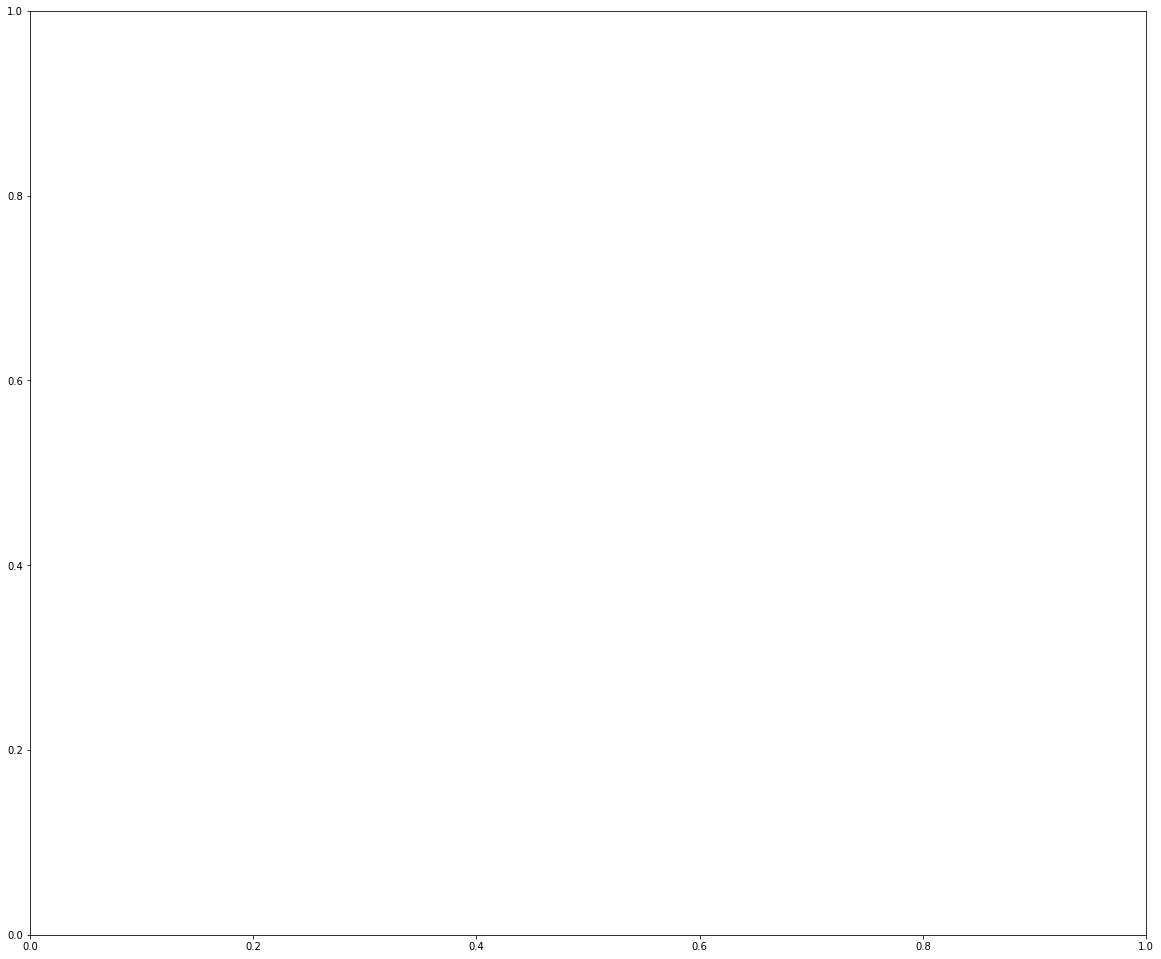

In [32]:
plt.figure(figsize=(20,17))
plt.plot(range(0,44),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,44),y_test,label='True Value',marker='^',lw=2)
plt.plot(range(0,44),error,marker='^',color='red',label='error',lw=2)
#plt.hline(0,range(0,44))
for i in range(0,44):
    plt.annotate(round(y_test.tolist()[i]),(i,y_test.tolist()[i]))
# for i in range(0,44):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
for i in range(0,44):
    plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,error.tolist()[i]))
plt.xlabel('Index')
plt.ylabel('YS_MPa')
plt.legend()
#
plt.savefig('Test22.png',dpi=200)

In [116]:
y

0      2757
1      2670
2      2649
3      2473
4      2456
       ... 
128     215
129     209
130     196
131     158
132     140
Name: YS_MPa, Length: 133, dtype: int64

In [25]:
error=y_test-predict
#plt.plot(range(0,43),error,marker='^',color='red',label='error')

In [160]:
pip=models['9']
pip

Pipeline(steps=[('s',
                 RFE(estimator=DecisionTreeRegressor(),
                     n_features_to_select=9)),
                ('m', DecisionTreeRegressor())])

In [161]:
pip.fit(X_train,y_train)

Pipeline(steps=[('s',
                 RFE(estimator=DecisionTreeRegressor(),
                     n_features_to_select=9)),
                ('m', DecisionTreeRegressor())])

In [162]:
pre=pip.predict(X_test)

In [163]:
er=metrics.mean_squared_error(pre,y_test)

In [164]:
er

85568.02272727272

In [165]:
sqrt()

NameError: name 'sqrt' is not defined